<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описательные-статистики" data-toc-modified-id="Описательные-статистики-1">Описательные статистики</a></span></li><li><span><a href="#1.-Данные" data-toc-modified-id="1.-Данные-2">1. Данные</a></span></li><li><span><a href="#2.-Описательные-статистики" data-toc-modified-id="2.-Описательные-статистики-3">2. Описательные статистики</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Максимальное-и-минимальное-значения" data-toc-modified-id="2.1-Максимальное-и-минимальное-значения-3.0.1">2.1 Максимальное и минимальное значения</a></span></li><li><span><a href="#2.2-Меры-центральной-тенденции-(среднего-уровня)" data-toc-modified-id="2.2-Меры-центральной-тенденции-(среднего-уровня)-3.0.2">2.2 Меры центральной тенденции (среднего уровня)</a></span></li><li><span><a href="#2.3-Меры-разброса" data-toc-modified-id="2.3-Меры-разброса-3.0.3">2.3 Меры разброса</a></span></li><li><span><a href="#2.4-Квантили" data-toc-modified-id="2.4-Квантили-3.0.4">2.4 Квантили</a></span></li><li><span><a href="#2.5-Хочу-всё-и-сразу" data-toc-modified-id="2.5-Хочу-всё-и-сразу-3.0.5">2.5 Хочу всё и сразу</a></span></li></ul></li></ul></li><li><span><a href="#3.-Группировка" data-toc-modified-id="3.-Группировка-4">3. Группировка</a></span></li><li><span><a href="#4.-Apply" data-toc-modified-id="4.-Apply-5">4. Apply</a></span></li><li><span><a href="#5.-Гистограммы" data-toc-modified-id="5.-Гистограммы-6">5. Гистограммы</a></span></li><li><span><a href="#6.-Усытые-ящики" data-toc-modified-id="6.-Усытые-ящики-7">6. Усытые ящики</a></span></li></ul></div>



#  Описательные статистики

В этой тетрадке мы поговорим про описательные статистики и простые визуализации.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

Опция `matplotlib inline` - позволяет рисовать графики прямо в ноутбуке.

In [2]:
%matplotlib inline

# 1. Данные

In [3]:
df = pd.read_csv("youtube_data_short.csv", sep = "\t")

In [4]:
print(df.shape)

(19124, 10)


In [5]:
df[105:112]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
105,"""Первая четверть"" Юбилейный концерт в Олимпийс...",11.0,0.0,125.0,rock,арбенина,2225.0,NaN,NaN,8
106,"""Первая четверть"" юбилейный концерт Дианы Арбе...",43.0,3.0,399.0,rock,арбенина,3177.0,NaN,NaN,0
107,"""Перелётная птица"" [Москва, 2012г.]",2.0,3.0,56.0,shanson,ирина_круг,8325.0,2.0,0.0,1984
108,"""Пока ещё не поздно"". Михаил Круг. Жизнь и люб...",7.0,7.0,108.0,shanson,ирина_круг,29928.0,5.0,0.0,2148
109,"""Пока ещё не поздно"". Михаил Круг. Любовь и см...",15.0,11.0,158.0,shanson,ирина_круг,27185.0,9.0,0.0,2148
110,"""Последний герой"" с Дианой Арбениной - пре...",1.0,1.0,31.0,rock,арбенина,1953.0,1.0,0.0,892
111,"""Последний герой: Павел Кашин (тизер программы...",0.0,1.0,9.0,rock,арбенина,954.0,NaN,NaN,757


In [6]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались).

# 2. Описательные статистики

In [7]:
np.nanmean(df.likeCount.values)

5735.014482758621

In [8]:
df.likeCount.dropna().values.mean()

5735.014482758621

### 2.1 Максимальное и минимальное значения

Посмотрим, какое в таблице есть максимальное и минимальное количество лайков под видео.

In [9]:
df.likeCount.max()

1686810.0

In [10]:
df['likeCount'].min()

0.0

Обратите внимание, что мы можем обращаться к столбцам ещё и через точку (только если имя столбца не содержит пробелов / точек / запятых / и т.д.). Давайте посмотрим кто накопил такое большое число лайков под своим клипом. 

In [11]:
mx = df.likeCount.max()
mx

1686810.0

In [12]:
df[df.likeCount == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


### 2.2 Меры центральной тенденции (среднего уровня)

Меры центральной тенденции — показатели, представляющие собой ответ на вопрос: «На что похожа середина данных?». Середину можно описывать с помощью разных показателей! Давайте посмотрим на них. 

**Среднее**

В случае со средним значением «серединой» будет среднее арифметическое. Среднее значение отражает типичный показатель в наборе данных. Если мы случайно выберем один из показателей, то, скорее всего, получим значение, близкое к среднему.

In [13]:
df.likeCount.mean()

5735.014482758621

**Медиана**

Чтобы найти медиану, данные нужно расположить в порядке возрастания. Медианой будет значение, которое совпадает с серединой набора данных. Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

In [14]:
df.likeCount.median()

100.0

Медиана сильно отличается от среднего это происходит из-за выбросов, характеризующихся очедь длинным хвостом распределения.

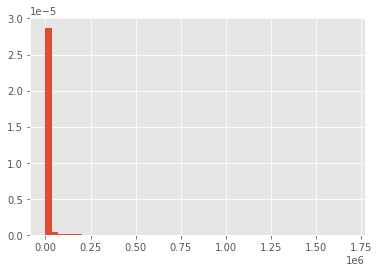

In [15]:
df.likeCount.hist(bins=50, density=True);

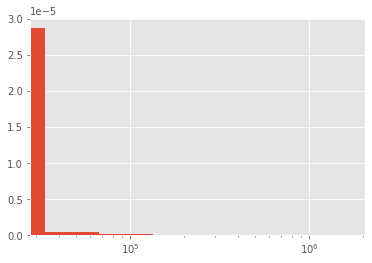

In [16]:
df.likeCount.hist(bins=50, density=True)
plt.xscale('log')
plt.show()

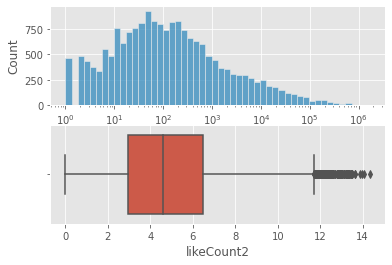

In [17]:
plt.subplot(211)
sns.histplot(data=df.assign(likeCount2=df['likeCount']+1), 
             x='likeCount2', bins=50, log_scale=True);

plt.subplot(212)
sns.boxplot(data=df.assign(likeCount2=np.log1p(df['likeCount'])), 
             x='likeCount2');

In [18]:
np.set_printoptions(suppress=True)


In [19]:
df['likeCount'].median(), df['likeCount'].mean()

(100.0, 5735.014482758621)

In [20]:
df['likeCount'].describe().astype(int)

count      18850
mean        5735
std        38903
min            0
25%           18
50%          100
75%          636
max      1686810
Name: likeCount, dtype: int64

__Запомните на всю жизнь:__ выбросы - зло. Среднее значение чувствительно к выбросам, а медиана нет. 

### 2.3 Меры разброса

Выше мы посмотрели на то насколько данные типичные. Кроме типичность интересно насколько в данных сильный разброс. Меры разброса отвечают на вопрос: «Как сильно мои данные могут отличаться от типичного значения?».

**Дисперсия и стандартное отклонение**

In [21]:
df.likeCount.var()

1513445598.6358452

In [22]:
df.likeCount.var(ddof=0) # дисперсия, variance

1513365309.7446709

In [23]:
df.likeCount.var(ddof=1) # несмещённый вариант

1513445598.6358452

In [24]:
df.likeCount.std(ddof=0) # стандартное отклонение, standard deviation

38901.99621799209

In [25]:
df.likeCount.std(ddof=1) # несмещённый вариант

38903.02814223907

### 2.4 Квантили

In [26]:
alpha = 0.99
df.likeCount.quantile(alpha)

128146.6499999979

Выходит, что у $99\%$ видео из выборки меньше $128146$ лайков, и у $1\%$ - больше. Выведем самых залайканные жанры из этого $1\%$. 

In [27]:
q = df.likeCount.quantile(alpha)
q

128146.6499999979

In [28]:
print(*df[df.likeCount > q].sort_values(
    by='likeCount', ascending=False)['title'][:10].values, 
      sep='\n')

Элджей & Feduk - Розовое вино
Miyagi & Эндшпиль feat. Рем Дигга - I Got Love (Official Video)
Егор Крид feat. Филипп Киркоров - Цвет настроения черный (премьера клипа, 2018)
Тимати feat. Егор Крид - Гучи (премьера клипа, 2018)
Four Seasons ~ Vivaldi
Ленинград — Экспонат
Let It Go (Disney's "Frozen") Vivaldi's Winter - The Piano Guys
Тимати feat. Егор Крид - Где ты, где я (премьера клипа, 2016)
The Best of Mozart
ЛСП - Тело


In [29]:
x = df[df.likeCount > q].music_style
x.value_counts()

rap        108
popsa       36
rock        19
classic     18
indi         7
estrada      1
Name: music_style, dtype: int64

### 2.5 Хочу всё и сразу

**Метод describe** считает всё и сразу! 

In [30]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [31]:
df.describe().T[['mean','50%']]

,mean,50%
commentCount,394.03,5.00
dislikeCount,745.34,5.00
likeCount,5735.01,100.00
viewCount,843648.59,11353.00
commentators_uniq,131.59,13.00
comments_obscene_cnt,8.95,0.00
video_age,1389.77,1213.00


Для каждой переменной мы видим: 

* `count` - число наблюдений, которое есть без пропусков
* `mean` - среднее значение
* `std` - стандартное отклонение
* `min` -  минимум
* `max` -  максимум
* `50%` -  медиана (половина выборки больше неё, половина меньше)
* `25%` -  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` -  75% квантиль

Можно построить такую же табличку только для категориальных переменных. 


In [32]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

In [33]:
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


* `count` -  число наблюдений, которое есть без пропусков
* `unique` - число уникальных значений (категорий), которые принимает переменная
* `top` - мода для каждой категории
* `freq` - частота, с которой встречается мода

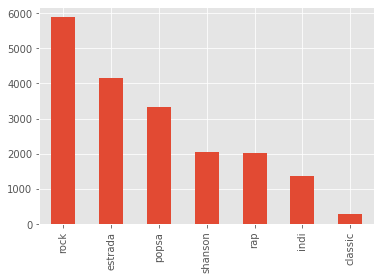

In [34]:
df['music_style'].value_counts().plot(kind='bar');

# 3. Группировка

Если бы нас попросили посчитать, какое среднее число лайков ставят под видео разных жанров, мы могли бы узнать ответ с помощью срезов. 

In [35]:
df[df.music_style == 'rap'].likeCount.mean()

26802.456253089473

In [36]:
df[df.music_style == 'popsa'].likeCount.mean()

7492.273791654158

Такой код надо продублировать для каждого жанра. Это не очень эффективно. Чтобы так не делать, придумали группировки. Их обычно делают с помощью метода `groupby`.

In [37]:
df.groupby(['music_style'])[['likeCount', 'dislikeCount']].agg(['mean', 'median'])

likeCount         dislikeCount       
                 mean  median         mean median
music_style                                      
classic      28663.33  536.00      1236.23  18.00
estrada        938.69   47.00       173.57   3.00
indi          2471.84   37.00       220.42   2.00
popsa         7492.27  323.00       790.16  15.00
rap          26802.46 2656.00      4099.58 154.00
rock          2132.89   80.00       287.70   3.00
shanson        440.39   17.00        45.49   1.00

В качестве аргумента в этой переменной нужно указать по каким переменным мы хотели бы осуществить группировку применяемой функции. В данной ситуации это жанр.

Можно делать `groupby` по нескольким колонкам, получать результаты по нескольким колонкам и даже применять несколько функций за раз! 

In [38]:
(df['commentators_uniq'] > 0).sum()

12314

In [39]:
df['is_comment'] = 1*(df['commentators_uniq'] > 0)  # есть ли под видео комментарии 
df['is_comment'].value_counts()

1    12314
0     6810
Name: is_comment, dtype: int64

In [40]:
df.groupby(['music_style', 'is_comment'])[['dislikeCount', 'likeCount']]\
    .agg(['count','min','max','mean'])

dislikeCount                        likeCount        \
                              count  min       max    mean     count   min   
music_style is_comment                                                       
classic     0                    32 0.00   6127.00  206.12        32  1.00   
            1                   265 0.00  52892.00 1360.62       265  9.00   
estrada     0                  1589 0.00   2584.00    9.33      1589  0.00   
            1                  2362 0.00 348770.00  284.05      2362  0.00   
indi        0                   719 0.00  14244.00   69.89       719  0.00   
            1                   638 0.00  32478.00  390.06       638  0.00   
popsa       0                   754 0.00  82016.00  218.58       754  0.00   
            1                  2577 0.00 177367.00  957.40      2577  0.00   
rap         0                   238 0.00 194450.00 3435.58       238  6.00   
            1                  1785 0.00 640698.00 4188.11      1785 11.00   
rock        0                  2196 0.00   2514.00   16.92      2196  0.00   
            1                  3639 0.00 133644.00  451.10      3639  0.00   
shanson     0                  1200 0.00   1712.00    4.72      1200  0.00   
            1                   856 0.00  12906.00  102.64       856  0.00   

                                            
                              max     mean  
music_style is_comment                      
classic     0           250835.00  8253.22  
            1           849676.00 31127.95  
estrada     0            17511.00    98.01  
            1           377957.00  1504.24  
indi        0           389416.00  1231.40  
            1           218384.00  3869.77  
popsa       0           222212.00  1544.50  
            1           698902.00  9232.52  
rap         0          1297718.00 22701.93  
            1          1686810.00 27349.19  
rock        0            40720.00   186.52  
            1           827118.00  3307.45  
shanson     0            29401.00    78.51  
            1            85023.00   947.70

# 4. Apply 

Можно применить к каждому объекту ячейки одну и ту же функцию. Это можно сделать методом `apply`. Посчитаем число букв в названии каждого клипа из таблицы: 

In [41]:
name = 'NATASHA'
len(name)

7

In [42]:
df.title.head()

0                            "#2Маши "Свободные линии"
1            "ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )
2    "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...
3               "Earth song" премия МУЗ-тВ 2010 (LIVE)
4                       "FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)
Name: title, dtype: object

In [43]:
df.title.apply(len)[:10]

0    25
1    41
2    75
3    38
4    30
5    48
6    36
7    43
8    29
9    56
Name: title, dtype: int64

In [44]:
df.title.apply(len).mean() # средняя длина названия

35.293871574984315

Можно написать свою функцию и применить её к колонке. Например, вот так можно достать первую букву каждого имени: 

In [45]:
def my_function(name):
    return name[0]

example = "Настя"

my_function(example)

'Н'

In [46]:
df.title.apply(my_function)[-10:]

19114    ♫
19115    ♫
19116    ♫
19117    ♫
19118    ♫
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, dtype: object

Ровно то же самое можно сделать в одну строчку с помощью лямбда-функций. Это как обычная функция, но её нигде не надо объявлять. 

In [47]:
df.title.apply(lambda x: x[:3])[-10:]

19114    ♫ T
19115    ♫ К
19116    ♫ М
19117    ♫♡ 
19118    ♫♪Г
19119    ♫♪М
19120    ❤ 2
19121    モスク
19122    舞梅鬼
19123    🎄#п
Name: title, dtype: object

Преобразования можно делать сколь угодно сложными.

# 5. Гистограммы

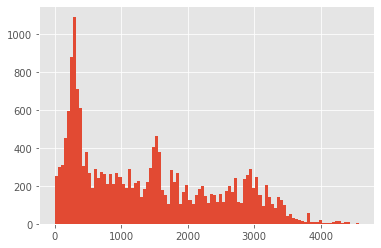

In [48]:
df['video_age'].hist(bins=100);

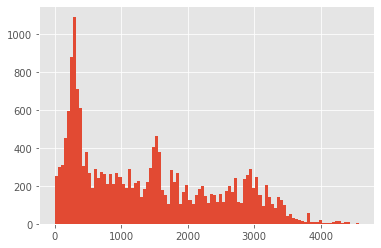

In [49]:
plt.hist(df['video_age'], bins=100);

Можно сгладить распределение.

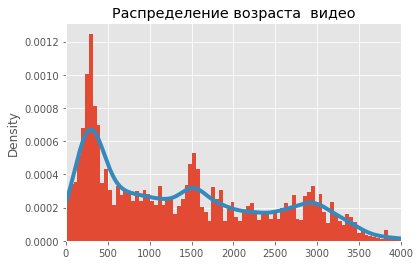

In [50]:
df['video_age'].hist(bins=100, density=True)
df['video_age'].plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title("Распределение возраста  видео");

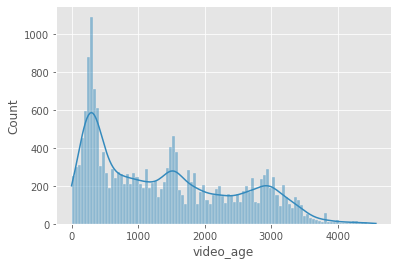

In [51]:
sns.histplot(data=df, x='video_age', bins=100, kde=True);

Можно построить сразу много гистограмм. 

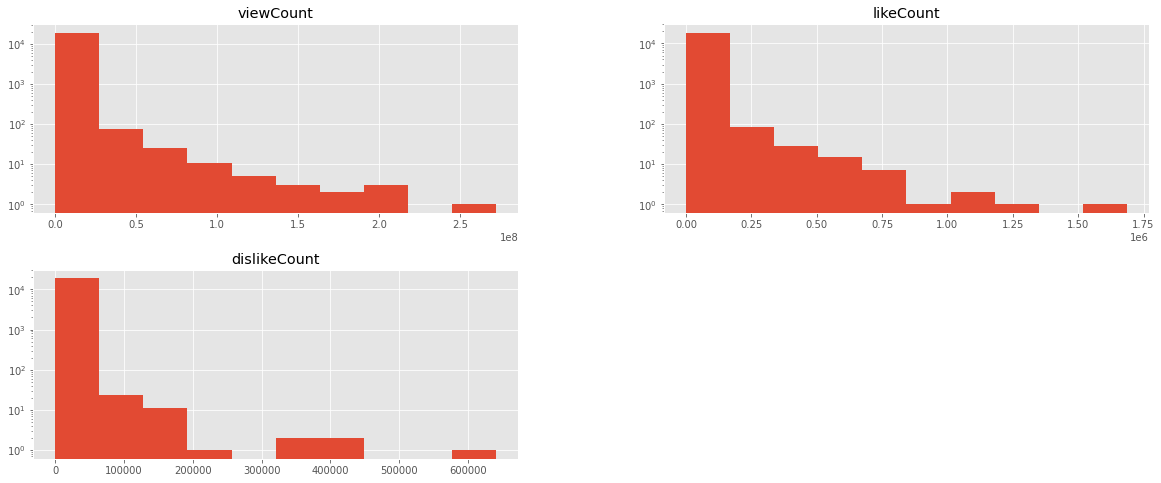

In [52]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(20, 8), log=True);

Можно построить гистограммы для логарифмов показателей. Обычно логарифмирование используют для того, чтобы сгладить выборосы и сделать данные более гладкими. Более того, на основе логарифма можно придумать преобразование, которое нормализует данные.

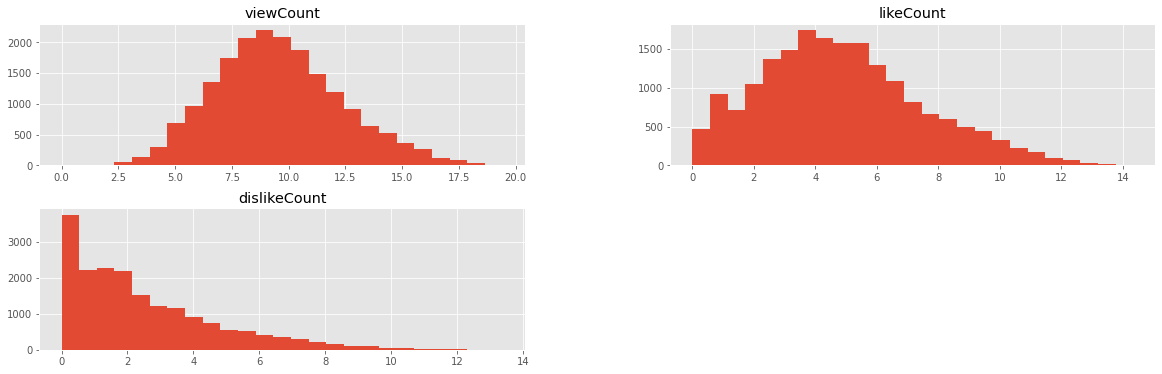

In [53]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 6), bins=25);

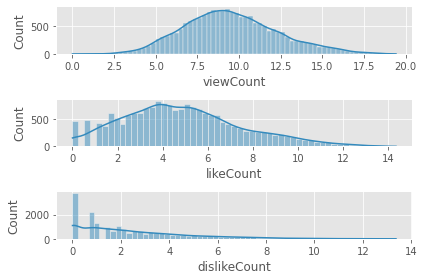

In [54]:
for i, col in enumerate(columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=df[col].apply(lambda x: np.log(1+x)), kde=True)
    
plt.tight_layout();

# 6. Усытые ящики

In [55]:
df_log = df[columns].apply(lambda x: np.log(x + 1)) # снова прологарифмируем
df_log['music_style'] = df['music_style']
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.28,7.25,3.78,popsa
1,14.61,9.26,6.54,popsa
2,10.60,5.60,2.40,popsa
3,9.38,5.10,2.08,popsa
4,11.42,6.39,3.00,popsa


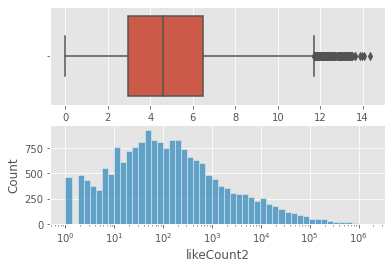

In [56]:
plt.subplot(211)
sns.boxplot(data=df_log, x='likeCount')
plt.subplot(212)
sns.histplot(data=df.assign(likeCount2=df['likeCount']+1), 
             x='likeCount2', bins=50, log_scale=True);

In [57]:
order = df_log.groupby('music_style')['likeCount'].median().sort_values().index

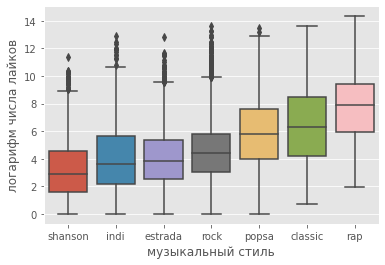

In [58]:
sns.boxplot(x='music_style', y='likeCount', data=df_log, order=order)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

Можно построить похожую картинку под названием виалончель. Она отражает то же самое, что и ящики с усами, но выглядит более красиво. 

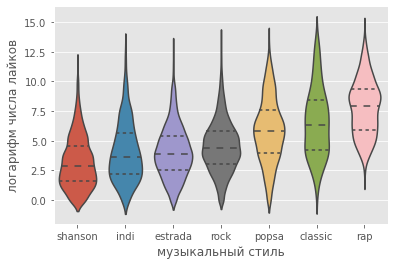

In [59]:
sns.violinplot(x='music_style', y='likeCount', 
               data=df_log, inner="quartile",
               order=order
              )

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');